In [ ]:
!pip install datasets --quiet
!pip install opendatasets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import opendatasets as op
import os
from PIL import Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# # Code to download datasets from kaggle API
# from google.colab import files

# files.upload()
# !ls -lha kaggle.json
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json
# !pwd
# !kaggle datasets list
# !kaggle datasets download -d wangziang/waste-pictures

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sasturkarh","key":"d6108f0685a40c06d93886977c7e36ce"}'}

In [2]:
# Function to get image paths to be later put in a dataframe
def get_image_paths_with_labels(list_image_folders, main_dir_name):
  image_paths=[]
  labels=[]
  for folder in list_image_folders:
    folder_path=os.path.join(main_dir_name, folder)
    if os.path.isdir(folder_path):
      images=os.listdir(folder_path)
      for image in images:
        image_path=os.path.join(folder_path, image)
        if os.path.isdir(image_path)==False and image_path.split('.')[1] in ['jpg','jpeg','png']:
            image_paths.append(image_path)
            labels.append(folder)
  return image_paths, labels

In [3]:
# Get image paths from all datasets (image folders) and merge in a single dataframe with labels (annotations)
image_dir = "/content/waste-pictures/train"
image_files = os.listdir(image_dir)
image_paths, labels = get_image_paths_with_labels(image_files, image_dir)
waste_df = pd.DataFrame()
waste_df['image_paths']=image_paths
waste_df['labels']=labels


image_dir = "/content/drive/My Drive/dataset-resized"
image_files = os.listdir(image_dir)
image_paths, labels = get_image_paths_with_labels(image_files, image_dir)
next_df = pd.DataFrame(data={'image_paths': image_paths, 'labels': labels})
waste_df = waste_df.append(next_df, ignore_index=True)

image_dir = "/content/drive/My Drive/TrashBox_train_set"
image_files = os.listdir(image_dir)
image_paths, labels = get_image_paths_with_labels(image_files, image_dir)
next_df = pd.DataFrame(data={'image_paths': image_paths, 'labels': labels})
waste_df = waste_df.append(next_df, ignore_index=True)

<ipython-input-3-1dc147f01342>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  waste_df = waste_df.append(next_df, ignore_index=True)
<ipython-input-3-1dc147f01342>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  waste_df = waste_df.append(next_df, ignore_index=True)


In [4]:
waste_df

,image_paths,labels
0,/content/waste-pictures/train/leaflet/leaflet ...,leaflet
1,/content/waste-pictures/train/leaflet/leaflet ...,leaflet
2,/content/waste-pictures/train/leaflet/leaflet ...,leaflet
3,/content/waste-pictures/train/leaflet/leaflet ...,leaflet
4,/content/waste-pictures/train/leaflet/leaflet ...,leaflet
...,...,...
34603,/content/drive/My Drive/TrashBox_train_set/pla...,plastic
34604,/content/drive/My Drive/TrashBox_train_set/pla...,plastic
34605,/content/drive/My Drive/TrashBox_train_set/pla...,plastic
34606,/content/drive/My Drive/TrashBox_train_set/pla...,plastic


In [5]:
waste_df['labels'].unique()

array(['leaflet', 'chopsticks', 'newspaper', 'penholder', 'bandaid',
       'bowlsanddishes', 'glassbottle', 'XLight', 'plasticbag', 'carton',
       'toothbrush', 'nailpolishbottle', 'plasticene', 'napkin', 'bread',
       'battery', 'cans', 'toothpastetube', 'cigarettebutt', 'rag',
       'bulb', 'diapers', 'leftovers', 'traditionalChinesemedicine',
       'nut', 'plasticbottle', 'facialmask', 'milkbox', 'thermometer',
       'medicinebottle', 'watermelonrind', 'tabletcapsule', 'toothpick',
       'pesticidebottle', 'cardboard', 'glass', 'metal', 'paper',
       'plastic', 'trash', 'e-waste', 'medical'], dtype=object)

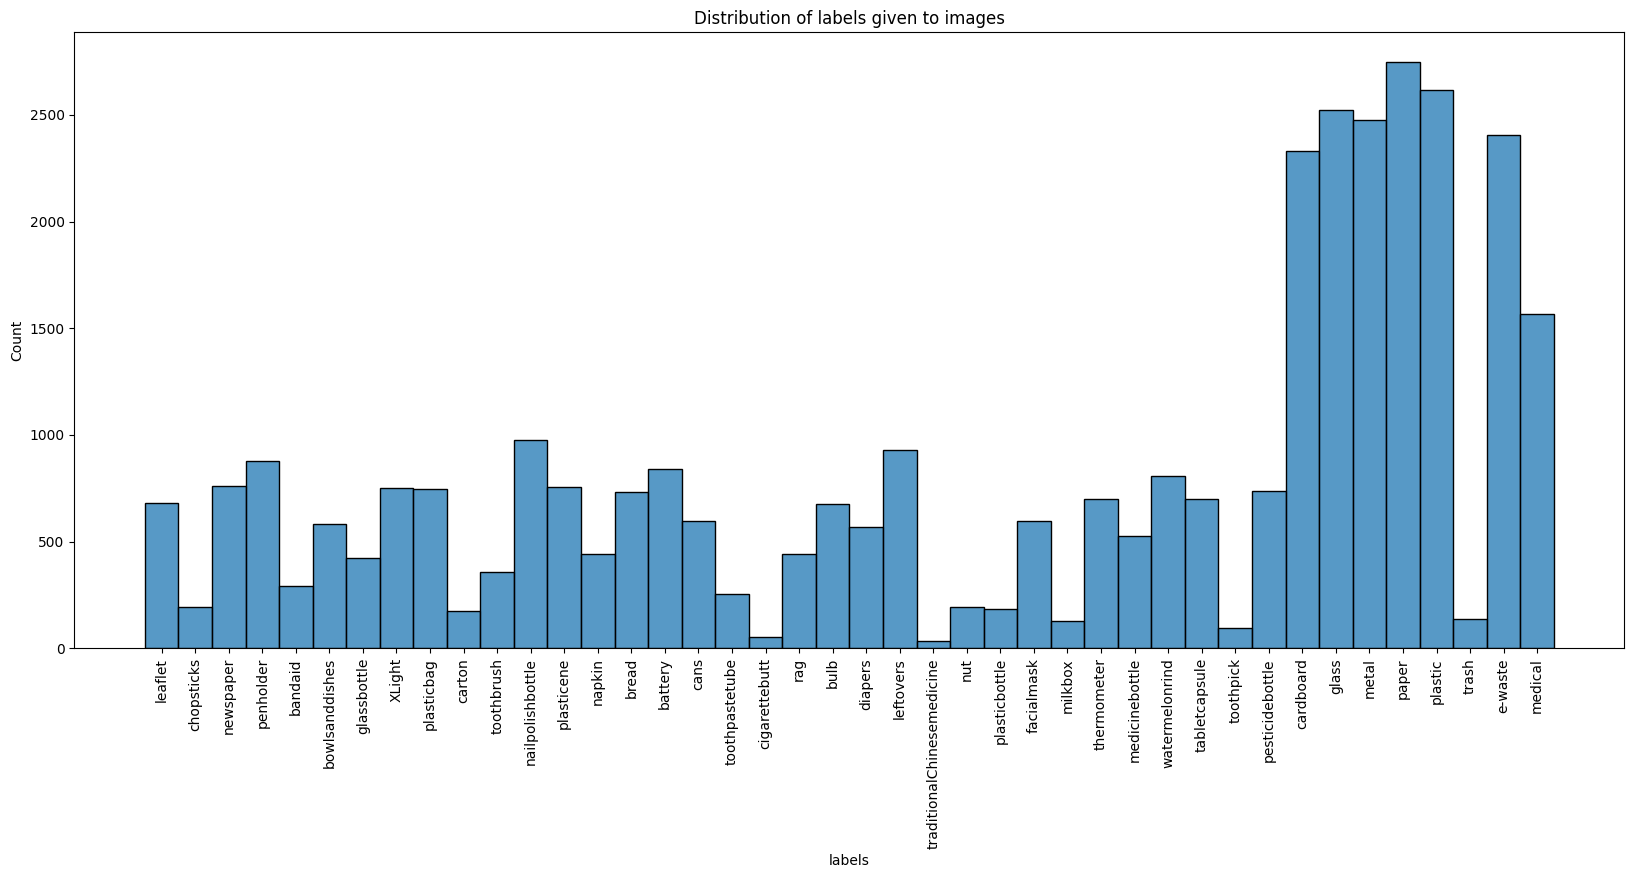

In [6]:
plt.figure(figsize=(20,8))
sns.histplot(waste_df['labels'])
plt.title("Distribution of labels given to images")
plt.xticks(rotation=90)
plt.show()

In [7]:
# Assign broader categories to labels
waste_df.loc[waste_df['labels'].isin(['plasticbag', 'plasticene', 'plastic','plasticbottle','penholder','nailpolishbottle','pesticidebottle']), 'category'] = 'plastic'
waste_df.loc[waste_df['labels'].isin(['leaflet', 'newspaper', 'paper','milkbox']), 'category'] = 'paper'
waste_df.loc[waste_df['labels'].isin(['bowlsanddishes', 'glassbottle','bulb','glass']), 'category'] = 'glass'
waste_df.loc[waste_df['labels'].isin(['traditionalChinesemedicine', 'thermometer','medicinebottle','tabletcapsule','medical','XLight']), 'category'] = 'medical'
waste_df.loc[waste_df['labels'].isin(['bandaid', 'toothbrush','napkin','bread','toothpastetube','cigarettebutt','rag','diapers','leftovers','nut','watermelonrind','facialmask','chopsticks', 'toothpick','trash']), 'category'] = 'trash'
waste_df.loc[waste_df['labels'].isin(['cans','metal']), 'category'] = 'metal'
waste_df.loc[waste_df['labels'].isin(['carton', 'cardboard']), 'category'] = 'cardboard'
waste_df.loc[waste_df['labels'].isin(['battery', 'e-waste']), 'category'] = 'e-waste'

In [8]:
# Check if all labels hae been assigned categories
waste_df['category'].isnull().sum()

0

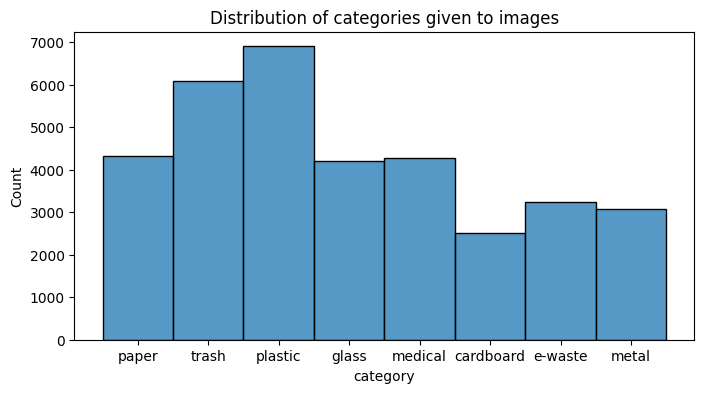

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(waste_df['category'])
plt.title("Distribution of categories given to images")
plt.show()

In [10]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [62]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, custom

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


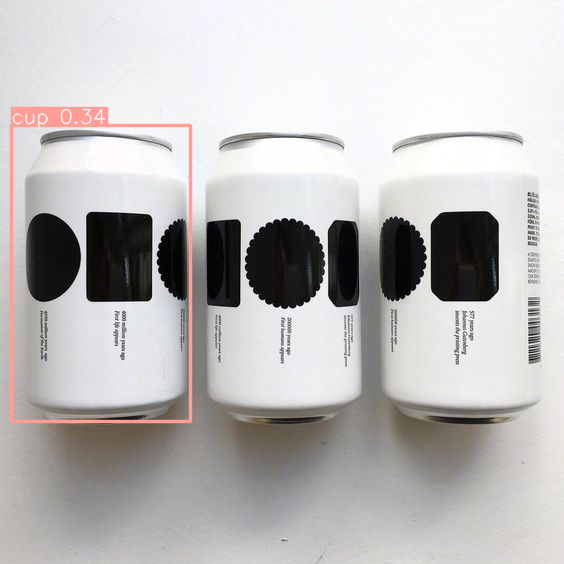

In [66]:
# Images
img = Image.open(waste_df['image_paths'][10000])  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

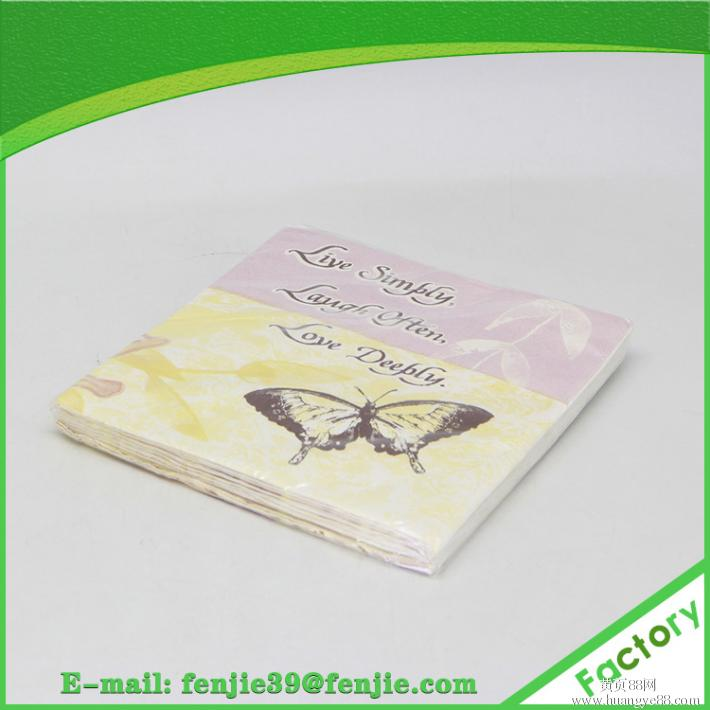

In [67]:
# Images
img = Image.open(waste_df['image_paths'][8000])  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

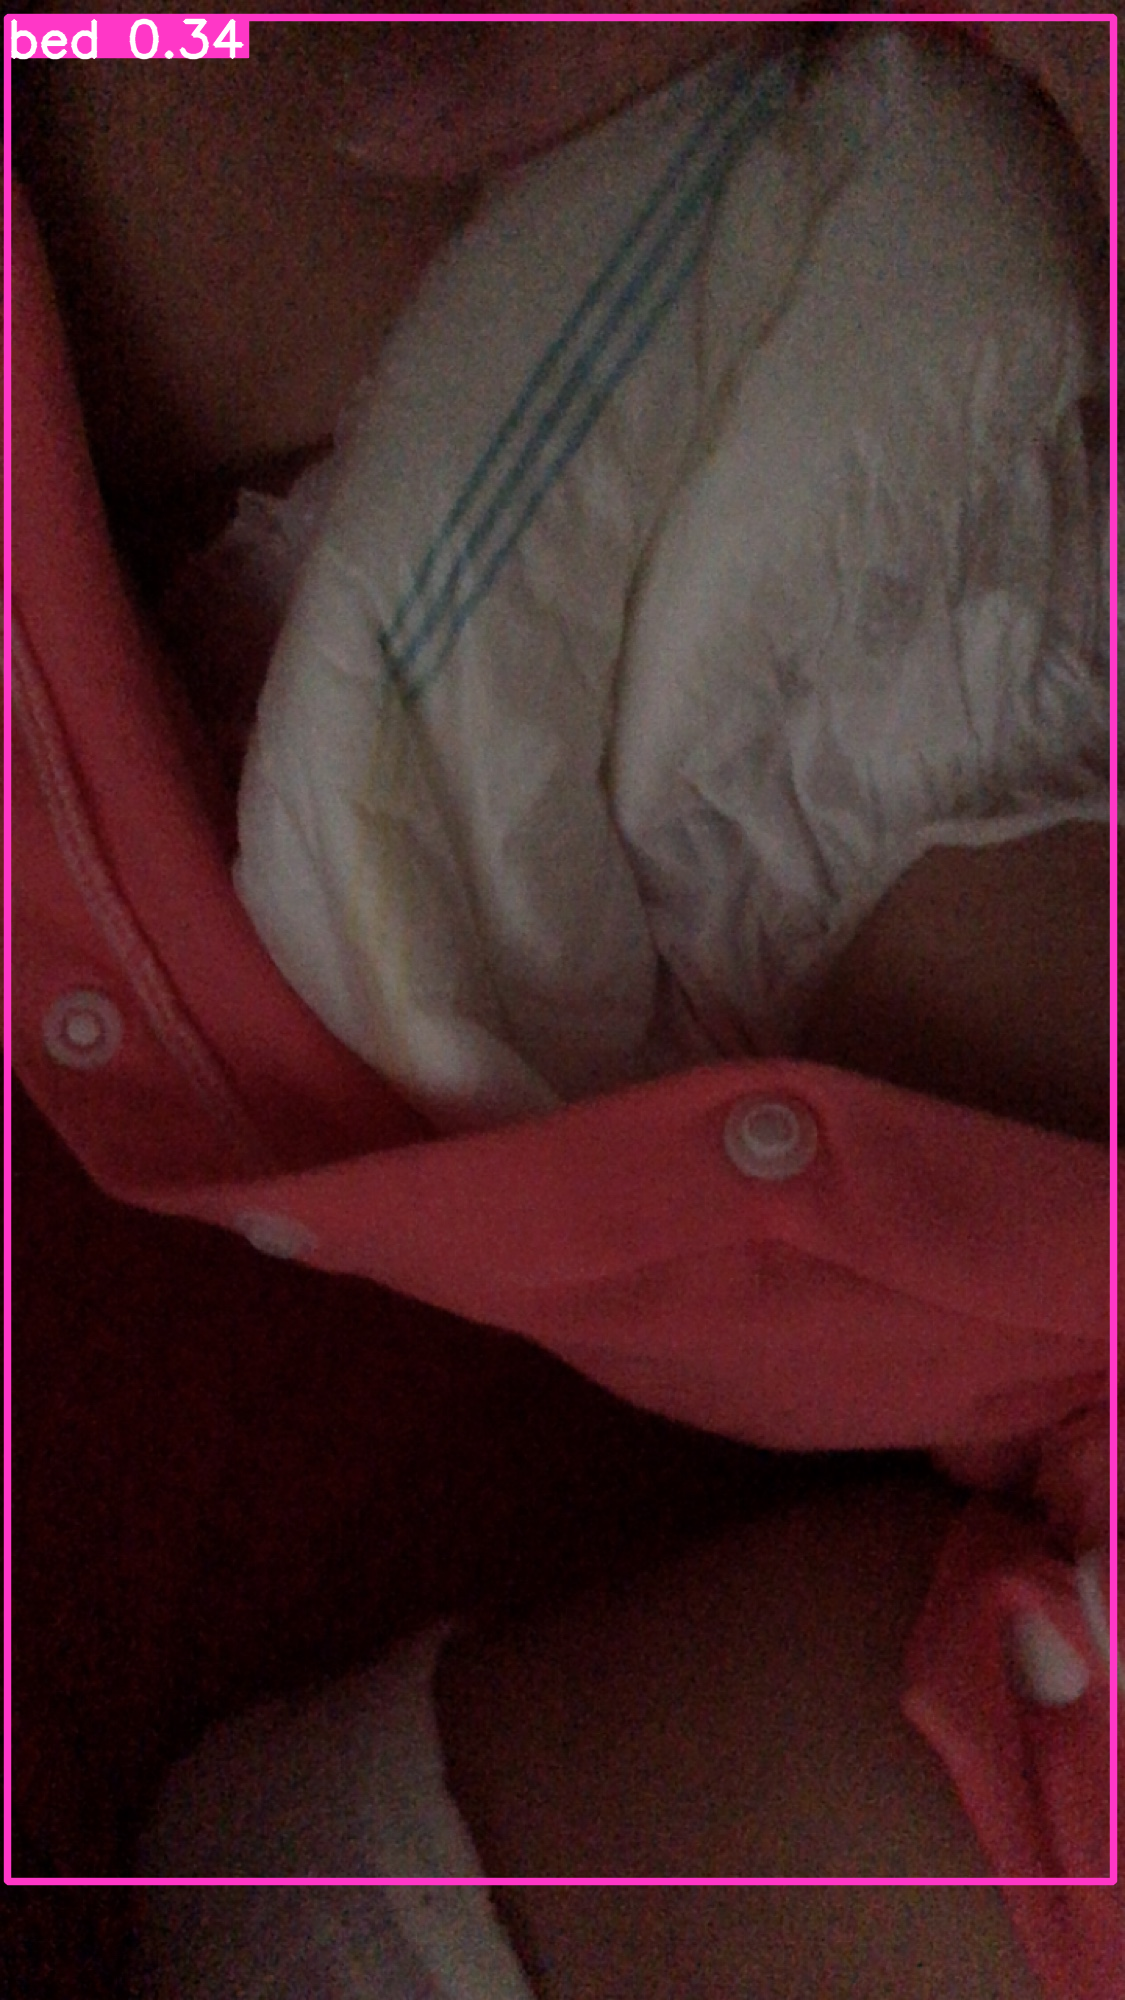

In [70]:
# Images
img = Image.open(waste_df['image_paths'][12000])  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

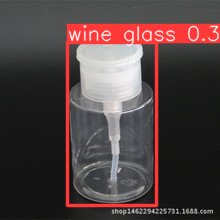

In [71]:
# Images
img = Image.open(waste_df['image_paths'][6000])  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

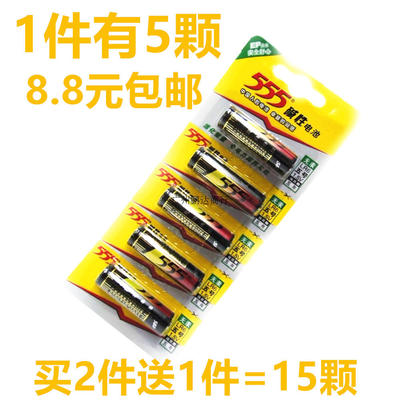

In [75]:
img = Image.open(waste_df['image_paths'][9500])  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.